# Teen Market Segmentation

For this analysis, we will use a dataset representing a random sample of 30,000 U.S. high school students who had pro les on a well-known  Social Network Services (SNS) in 2006. 
<br> Given the text of teenagers' SNS pages, we can identify groups that share common interests such as sports, religion, or music. 
<br> Clustering can automate the process of discovering the natural segments in this population.

A text mining tool was used to divide the remaining SNS page content into words. 
<br> From the top 500 words appearing across all the pages, 36 words were chosen to represent  ve categories of interests: namely extracurricular activities, fashion, religion, romance, and antisocial behavior. 
<br> The 36 words include terms such as football, sexy, kissed, bible, shopping, death, and drugs. <br> 
The  final dataset indicates, for each person, how many times each word appeared in the person's SNS profile.


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("./data/snsdata.csv")
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [3]:
data.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [4]:
len(data)

30000

In [5]:
data.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [6]:
data.isna().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

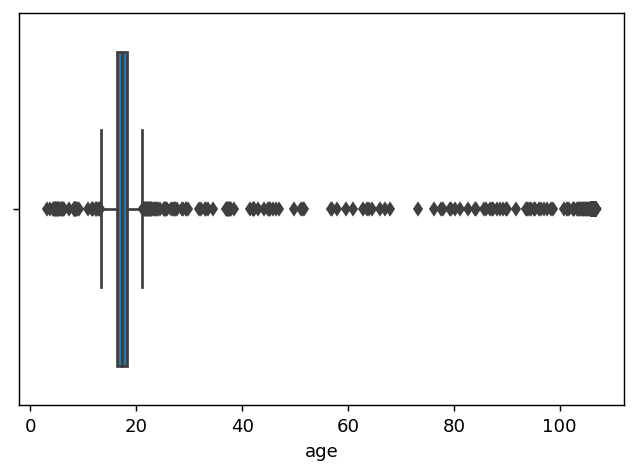

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(dpi =130)
sns.boxplot(data["age"])

In [8]:
q1 = data["age"].quantile(0.25)
q3 = data["age"].quantile(0.75)

iqr = q3 - q1

print("1st Quartile: " ,  q1)
print("3rd Quartile: " ,  q3)
print("Inter-Quartile Range: " ,  iqr)

1st Quartile:  16.312
3rd Quartile:  18.259
Inter-Quartile Range:  1.9469999999999992


In [9]:
lower_age_bound = q1 - 1.5*iqr
upper_age_bound = q3 + 1.5*iqr

print("Lower Age Bound: " , lower_age_bound)
print("Upper Age Bound: " , upper_age_bound)

Lower Age Bound:  13.391500000000002
Upper Age Bound:  21.179499999999997


In [10]:
data["age"].isna().sum()

5086

In [12]:
import numpy as np

data["age"] = data["age"].map(lambda x: x if lower_age_bound < x <upper_age_bound else np.nan )

In [13]:
data["age"].isna().sum()

5447

In [14]:
data["age"].describe()

count    24553.000000
mean        17.263242
std          1.168138
min         13.396000
25%         16.307000
50%         17.270000
75%         18.229000
max         21.158000
Name: age, dtype: float64

In [15]:
avr_age_by_grad_year = data.groupby("gradyear").age.mean()
avr_age_by_grad_year

gradyear
2006    18.668073
2007    17.711481
2008    16.780873
2009    15.825939
Name: age, dtype: float64

In [17]:
age_from_avg = data.gradyear.map(lambda x: avr_age_by_grad_year[x])
age_from_avg

0        18.668073
1        18.668073
2        18.668073
3        18.668073
4        18.668073
           ...    
29995    15.825939
29996    15.825939
29997    15.825939
29998    15.825939
29999    15.825939
Name: gradyear, Length: 30000, dtype: float64

In [19]:
data.age = np.where(data.age.isna(), age_from_avg, data.age)

In [20]:
data["age"].isna().sum()

0

In [21]:
data["gender"].value_counts()

F    22054
M     5222
Name: gender, dtype: int64

### Imputing Gender Information via Classification 

In [22]:
y = data["gender"].dropna()
y.head()

0    M
1    F
2    M
3    F
5    F
Name: gender, dtype: object

In [23]:
len(y)

27276

In [24]:
X = data.dropna().iloc[:, 3:40]
X.head()

,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,69,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,142,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

predictor = RandomForestClassifier(n_jobs= -1)
scores = cross_val_score(predictor, X,y, cv=10)
print("Cross validation scores:", scores)

Cross validation scores: [0.80351906 0.80791789 0.8042522  0.82038123 0.81671554 0.82001466
 0.81994866 0.83278328 0.82764943 0.83608361]


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, shuffle =True, random_state = 123, stratify = y)
predictor2 = RandomForestClassifier()
predictor2.fit(X_train, y_train)


RandomForestClassifier()

In [27]:
from sklearn.metrics import classification_report

predictions = predictor2.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           F       0.85      0.94      0.90      6616
           M       0.56      0.30      0.39      1567

    accuracy                           0.82      8183
   macro avg       0.71      0.62      0.64      8183
weighted avg       0.80      0.82      0.80      8183



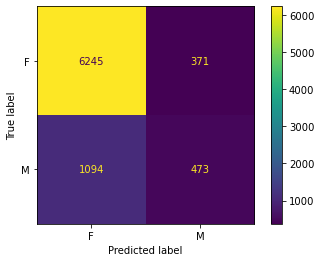

In [30]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(predictor2, X_test,y_test)

In [31]:
nonMissingData = data.dropna()

femaleData = nonMissingData[nonMissingData.gender == "F"]
maleData = nonMissingData[nonMissingData.gender == "M"]

print(len(femaleData), len(maleData))

22054 5222


In [32]:
from sklearn.utils import resample

femaleDownsampled = resample(femaleData, replace= False, n_samples = 6000, random_state = 123)

len(femaleDownsampled)

6000

In [34]:
dataDownsampled = pd.concat([maleData, femaleDownsampled])
len(dataDownsampled)

11222

In [36]:
X_down = dataDownsampled.iloc[:,3:40]
y_down = dataDownsampled["gender"]

X_train, X_test, y_train, y_test = train_test_split(X_down, y_down , test_size = 0.3, shuffle =True, random_state = 123, stratify = y_down)

predictor2.fit(X_train, y_train)


RandomForestClassifier()

In [37]:
predictions = predictor2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           F       0.74      0.75      0.74      1800
           M       0.71      0.69      0.70      1567

    accuracy                           0.72      3367
   macro avg       0.72      0.72      0.72      3367
weighted avg       0.72      0.72      0.72      3367



In [38]:
predictor2.fit(X_down, y_down)

RandomForestClassifier()

In [40]:
data_gender_nan = data[data.gender.isna()]
data_gender_nan.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
4,2006,NaN,18.995000,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
13,2006,NaN,18.668073,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2006,NaN,18.668073,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2006,NaN,18.668073,135,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,2006,NaN,18.668073,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
data_gender_nan.gender = predictor2.predict(data_gender_nan.iloc[:, 3:40])

C:\Users\ergun\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [43]:
data_gender_nan.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
4,2006,F,18.995000,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
13,2006,M,18.668073,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2006,M,18.668073,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2006,F,18.668073,135,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,2006,M,18.668073,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
data.gender.isna().sum()

2724

In [46]:
data_imputed = pd.concat([data.dropna(), data_gender_nan])

In [47]:
data_imputed.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982000,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801000,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335000,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2006,F,18.668073,142,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [48]:
len(data_imputed)

30000

In [49]:
data_imputed.gender.isna().sum()

0

### Clustering with KMeans

In [52]:
data2 = pd.get_dummies(data_imputed)
data2.head()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M
0,2006,18.982000,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,18.801000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2006,18.335000,69,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2006,18.875000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,2006,18.668073,142,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [53]:
X = data2.iloc[:, 2:41]
X.head()

,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,69,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,142,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [136]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled

,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M
0,-0.317073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
1,-0.487805,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.195122,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0
3,-0.487805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.975610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.609756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
29996,0.390244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
29997,-0.463415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
29998,-0.487805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0


In [143]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2, init = "k-means++", n_init = 10)

In [144]:
km.fit(X_scaled)

KMeans(n_clusters=2)

In [145]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [146]:
np.unique(km.labels_, return_counts =True)

(array([0, 1]), array([29999,     1], dtype=int64))

In [141]:
X_scaled[km.labels_ == 2]

,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M
1,-0.487805,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,-0.487805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
50,0.414634,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,-0.365854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,-1.0,1.0
91,-0.463415,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29930,1.219512,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
29938,-0.365854,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
29964,-0.487805,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,4.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0
29973,0.390244,1.0,2.0,0.0,0.0,0.0,5.0,0.0,2.0,1.0,...,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


In [142]:
X_scaled.iloc[12854, :]

friends           0.585366
basketball        0.000000
football          2.000000
soccer            0.000000
softball          0.000000
volleyball        0.000000
swimming          1.000000
cheerleading      0.000000
baseball          0.000000
tennis            0.000000
sports            0.000000
cute              1.000000
sex              22.000000
sexy              1.000000
hot               0.000000
kissed            0.000000
dance             1.000000
band              1.000000
marching          0.000000
music             0.000000
rock              1.000000
god              10.000000
church            0.000000
jesus             1.000000
bible             0.000000
hair             12.000000
dress             2.000000
blonde          327.000000
mall              0.000000
shopping          0.000000
clothes           1.000000
hollister         0.000000
abercrombie       0.000000
die               6.000000
death             6.000000
drunk             6.000000
drugs             0.000000
g

In [134]:
X_scaled.blonde.describe()

count    30000.000000
mean         0.098933
std          1.942319
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        327.000000
Name: blonde, dtype: float64

In [148]:
data_imputed[data_imputed["blonde"] >= 10]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
6916,2006,F,19.387000,20,0,1,0,0,0,0,...,10,0,0,0,0,0,0,0,0,0
14187,2007,F,18.119000,44,0,2,0,0,0,1,...,327,0,0,1,0,0,6,6,6,0
19366,2008,M,16.780873,35,6,0,6,0,0,0,...,19,0,0,0,0,0,0,0,0,0
22669,2009,F,16.266000,104,1,0,0,2,0,0,...,16,1,0,0,0,0,0,0,1,0
26471,2009,F,15.543000,61,0,0,0,0,0,0,...,13,0,2,0,0,0,0,0,0,0


In [149]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled

,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M
0,0.008434,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,1.0
1,0.000000,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,1.0,0.0
2,0.083133,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000,0.0,0.0,1.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,1.0,0.0
4,0.171084,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090909,0.0,0.0,0.0,0.0,0.000000,0.125,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.054217,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,1.0
29996,0.043373,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,1.0
29997,0.001205,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,1.0
29998,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,1.0


In [151]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5, init = "k-means++", n_init = 10)
km.fit(X_scaled)
np.unique(km.labels_, return_counts =True)

(array([0, 1, 2, 3, 4]),
 array([ 6508,  6047, 14757,   708,  1980], dtype=int64))

In [153]:
centers = pd.DataFrame(km.cluster_centers_, columns = X_scaled.columns)
centers

,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M
0,0.027737,0.011486,0.025681,0.007222,0.000443,0.002371,0.002335,0.000802,0.014415,0.006454,...,3.771582e-03,0.007875,0.003244,0.002459,0.007424,0.006541,0.008374,0.002910,-6.661338e-16,1.000000e+00
1,0.043009,0.012940,0.016317,0.011068,0.013415,0.015852,0.007271,0.006927,0.004455,0.007298,...,1.248403e-01,0.013912,0.013487,0.011431,0.007750,0.008021,0.009571,0.002842,1.000000e+00,2.081668e-15
2,0.035730,0.008290,0.009810,0.006842,0.010238,0.009905,0.003361,0.004072,0.003074,0.004525,...,-7.979728e-16,0.006639,0.003606,0.003099,0.007246,0.007433,0.008434,0.002828,1.000000e+00,-2.303713e-15
3,0.047478,0.018008,0.036064,0.009573,0.013958,0.014931,0.006151,0.320151,0.011123,0.004991,...,6.651258e-02,0.027013,0.024168,0.020304,0.008731,0.009080,0.012359,0.005032,1.000000e+00,-5.551115e-17
4,0.045149,0.023300,0.034649,0.013064,0.019975,0.019556,0.008571,0.010909,0.011513,0.009211,...,6.891792e-02,0.154036,0.030308,0.023596,0.021623,0.019014,0.042637,0.016131,1.000000e+00,5.551115e-17


In [154]:
features = X_scaled.columns
features

Index(['friends', 'basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs', 'gender_F', 'gender_M'],
      dtype='object')

In [157]:
features[centers.iloc[0,:] > np.quantile(centers.iloc[0,:], 0.75)]

Index(['friends', 'basketball', 'football', 'baseball', 'sports', 'music',
       'rock', 'mall', 'drunk', 'gender_M'],
      dtype='object')

In [158]:
features[centers.iloc[1,:] > np.quantile(centers.iloc[1,:], 0.75)]

Index(['friends', 'football', 'volleyball', 'cute', 'hot', 'dance', 'dress',
       'mall', 'shopping', 'gender_F'],
      dtype='object')

In [159]:
features[centers.iloc[2,:] > np.quantile(centers.iloc[2,:], 0.75)]

Index(['friends', 'football', 'softball', 'volleyball', 'cute', 'hot', 'dance',
       'music', 'mall', 'gender_F'],
      dtype='object')

In [160]:
features[centers.iloc[3,:] > np.quantile(centers.iloc[3,:], 0.75)]

Index(['friends', 'football', 'cheerleading', 'cute', 'hot', 'mall',
       'shopping', 'clothes', 'hollister', 'gender_F'],
      dtype='object')

In [161]:
features[centers.iloc[4,:] > np.quantile(centers.iloc[4,:], 0.75)]

Index(['friends', 'cute', 'hot', 'hair', 'dress', 'mall', 'shopping',
       'clothes', 'drunk', 'gender_F'],
      dtype='object')

In [163]:
from sklearn.metrics import silhouette_score
inertia_list = []
silhouette_list = []

k_list = np.arange(2,11)

for k in k_list:
    kmeans = KMeans(n_clusters = k, init = "k-means++", n_init = 10)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    s_score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_list.append(s_score)
    

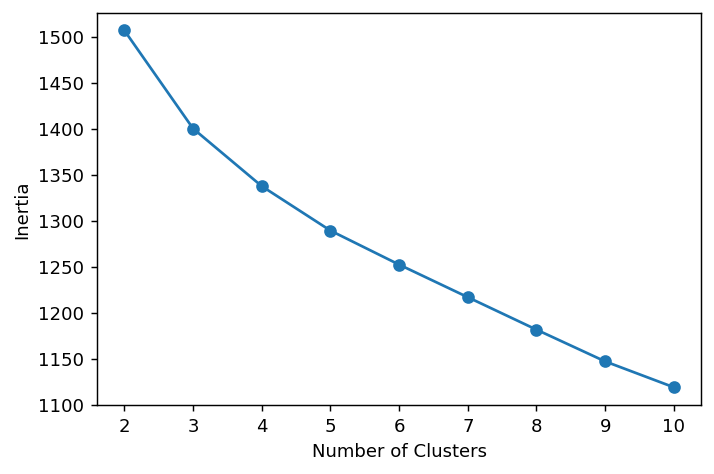

In [164]:
plt.figure(dpi =130)
plt.plot(k_list, inertia_list, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


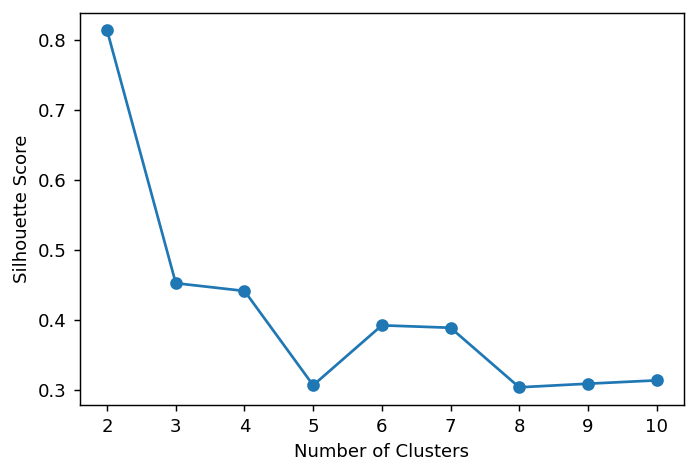

In [165]:
plt.figure(dpi =130)
plt.plot(k_list, silhouette_list, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [166]:
kmeans = KMeans(n_clusters = 2, init = "k-means++", n_init = 10)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [168]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns = X_scaled.columns)
centers

,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,gender_F,gender_M
0,0.038750,0.011043,0.014365,0.008536,0.011987,0.012399,0.004890,0.014908,0.004382,0.005647,...,0.039936,0.021523,0.009015,0.007487,0.008630,0.008608,0.011722,0.004017,1.000000e+00,5.828671e-16
1,0.027737,0.011486,0.025681,0.007222,0.000443,0.002371,0.002335,0.000802,0.014415,0.006454,...,0.003772,0.007875,0.003244,0.002459,0.007424,0.006541,0.008374,0.002910,-6.661338e-16,1.000000e+00


In [169]:
features[centers.iloc[0,:] > np.quantile(centers.iloc[0,:], 0.75)]

Index(['friends', 'cheerleading', 'cute', 'hot', 'dance', 'dress', 'mall',
       'shopping', 'clothes', 'gender_F'],
      dtype='object')

In [170]:
features[centers.iloc[1,:] > np.quantile(centers.iloc[1,:], 0.75)]

Index(['friends', 'basketball', 'football', 'baseball', 'sports', 'music',
       'rock', 'mall', 'drunk', 'gender_M'],
      dtype='object')